In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load data
data = pd.read_csv('User_Engagement.csv')
data1= pd.read_csv('User_Proficiency.csv')

In [4]:
data.head()

,USERID,NAME,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT
0,466,Sherie,5,2,4,3.8,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00
1,835,Donnajean,5,3,1,3.2,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,administrative Manager,2024-04-10T01:37:51.882-07:00
2,684,Roderigo,4,5,0,3.1,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00
3,52,Arin,3,3,3,3.0,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00
4,491,Tully,2,4,3,2.9,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00


In [5]:
data1.head()

,USERID,NAME,SKILLNAME,PROFICIENCYLEVEL
0,273,Madelin,DevOps practices,Advanced
1,772,Bernie,NaN,NaN
2,17,Fransisco,NaN,NaN
3,960,Lelia,NaN,NaN
4,268,Rhodia,Natural language processing,Intermediate


In [6]:
combined_data = pd.merge(data, data1, on='USERID', how='inner')

In [7]:
combined_data.head()

,USERID,NAME_x,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT,NAME_y,SKILLNAME,PROFICIENCYLEVEL
0,466,Sherie,5,2,4,3.8,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00,Sherie,Time management,Advanced
1,835,Donnajean,5,3,1,3.2,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,administrative Manager,2024-04-10T01:37:51.882-07:00,Donnajean,Vendor management,Intermediate
2,684,Roderigo,4,5,0,3.1,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00,Roderigo,Bash scripting,Advanced
3,52,Arin,3,3,3,3.0,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Arin,SEO (Search Engine Optimization),Advanced
4,491,Tully,2,4,3,2.9,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Tully,Incident response,Advanced


In [8]:
combined_data.drop('NAME_y', axis=1, inplace=True)
combined_data.rename(columns={'NAME_x': 'NAME'}, inplace=True)


In [9]:
combined_data.head()

,USERID,NAME,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT,SKILLNAME,PROFICIENCYLEVEL
0,466,Sherie,5,2,4,3.8,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00,Time management,Advanced
1,835,Donnajean,5,3,1,3.2,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,administrative Manager,2024-04-10T01:37:51.882-07:00,Vendor management,Intermediate
2,684,Roderigo,4,5,0,3.1,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00,Bash scripting,Advanced
3,52,Arin,3,3,3,3.0,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,SEO (Search Engine Optimization),Advanced
4,491,Tully,2,4,3,2.9,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Incident response,Advanced


In [10]:
print(combined_data.isnull().sum())


USERID                    0
NAME                      0
TOTAL_PROJECTS            0
TOTAL_SKILLS              0
TOTAL_CERTIFICATIONS      0
ENGAGEMENT_SCORE          0
EMAILID                   0
ADDRESS                   0
PHONE                     0
ROLE                      0
DESIGNATION               0
DATA_LOADED_AT            0
SKILLNAME               364
PROFICIENCYLEVEL        364
dtype: int64


In [11]:
# Fill missing values in the 'PROFICIENCYLEVEL' column with 0
combined_data['PROFICIENCYLEVEL'].fillna(0, inplace=True)

# Fill missing values in the 'SKILLNAME' column with the mode
combined_data['SKILLNAME'].fillna(combined_data['SKILLNAME'].mode()[0], inplace=True)

combined_data

,USERID,NAME,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT,SKILLNAME,PROFICIENCYLEVEL
0,466,Sherie,5,2,4,3.8,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00,Time management,Advanced
1,835,Donnajean,5,3,1,3.2,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,administrative Manager,2024-04-10T01:37:51.882-07:00,Vendor management,Intermediate
2,684,Roderigo,4,5,0,3.1,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00,Bash scripting,Advanced
3,52,Arin,3,3,3,3.0,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,SEO (Search Engine Optimization),Advanced
4,491,Tully,2,4,3,2.9,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Incident response,Advanced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,767,Consalve,0,0,0,0.0,crymerla@amazon.co.uk,Apt 65,8021740216,User,Lead Software Engineer,2024-04-10T01:37:51.882-07:00,AWS cloud computing,0
1001,891,Pippa,0,0,0,0.0,pleonardsoq@imageshack.us,Suite 61,5553221405,User,Solutions Consultant,2024-04-10T01:37:51.882-07:00,AWS cloud computing,0
1002,329,Kaycee,0,0,0,0.0,kmcneilly94@csmonitor.com,Suite 84,4921585743,User,Solutions Enabler,2024-04-10T01:37:51.882-07:00,AWS cloud computing,0
1003,795,Roby,0,0,0,0.0,rdubarrym2@google.co.jp,Room 126,8097860600,User,Solutions Enabler,2024-04-10T01:37:51.882-07:00,AWS cloud computing,0


In [12]:
data_processed = combined_data.drop(['USERID', 'NAME', 'DATA_LOADED_AT','PHONE'], axis=1)

In [18]:
from sklearn.preprocessing import LabelEncoder
combined_data['PROFICIENCYLEVEL'] = combined_data['PROFICIENCYLEVEL'].replace({'Advanced': 3, 'Intermediate': 2, 'Beginner': 1})
def categorize_score(score, level):
    if score <= 1.5 and level <= 1:
        return 'No'
    else:
        return 'Yes'

combined_data['SUITABLE_FOR_PROJECT_CATEGORY'] = combined_data.apply(lambda row: categorize_score(row['ENGAGEMENT_SCORE'], row['PROFICIENCYLEVEL']), axis=1)

    # Perform label encoding if necessary
label_encoder = LabelEncoder()
combined_data['SUITABLE_FOR_PROJECT_CATEGORY'] = label_encoder.fit_transform(combined_data['SUITABLE_FOR_PROJECT_CATEGORY'])



In [19]:
# Check the count of values in the SUITABLE_FOR_PROJECT_CATEGORY column
category_counts = combined_data['SUITABLE_FOR_PROJECT_CATEGORY'].value_counts()

print(category_counts)



1    526
0    479
Name: SUITABLE_FOR_PROJECT_CATEGORY, dtype: int64


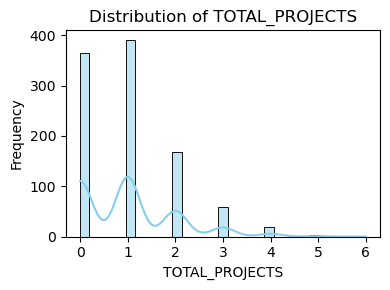

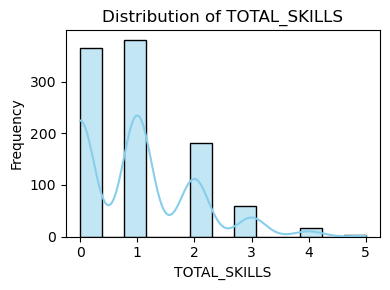

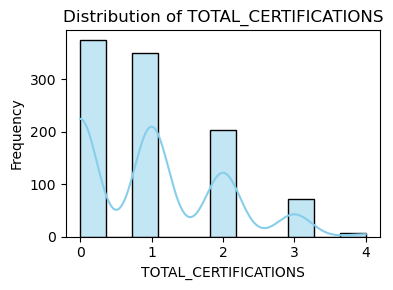

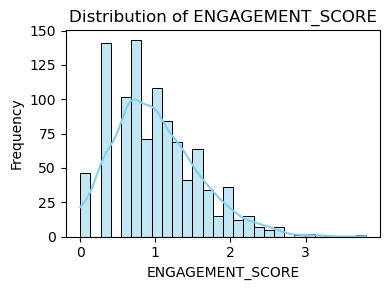

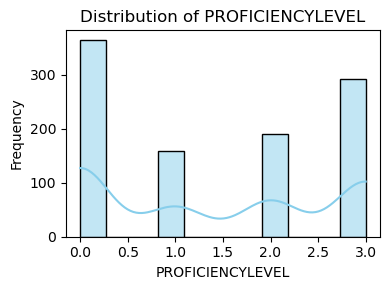

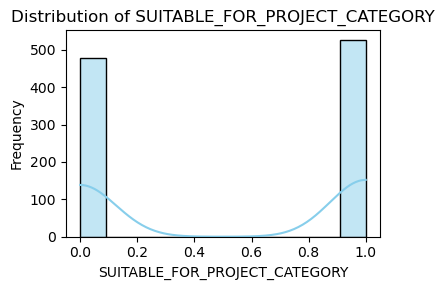

In [20]:
numerical_cols = ['TOTAL_PROJECTS', 'TOTAL_SKILLS', 'TOTAL_CERTIFICATIONS','ENGAGEMENT_SCORE','PROFICIENCYLEVEL','SUITABLE_FOR_PROJECT_CATEGORY'] 

for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(combined_data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    
    
    
    plt.tight_layout()  
    plt.show()


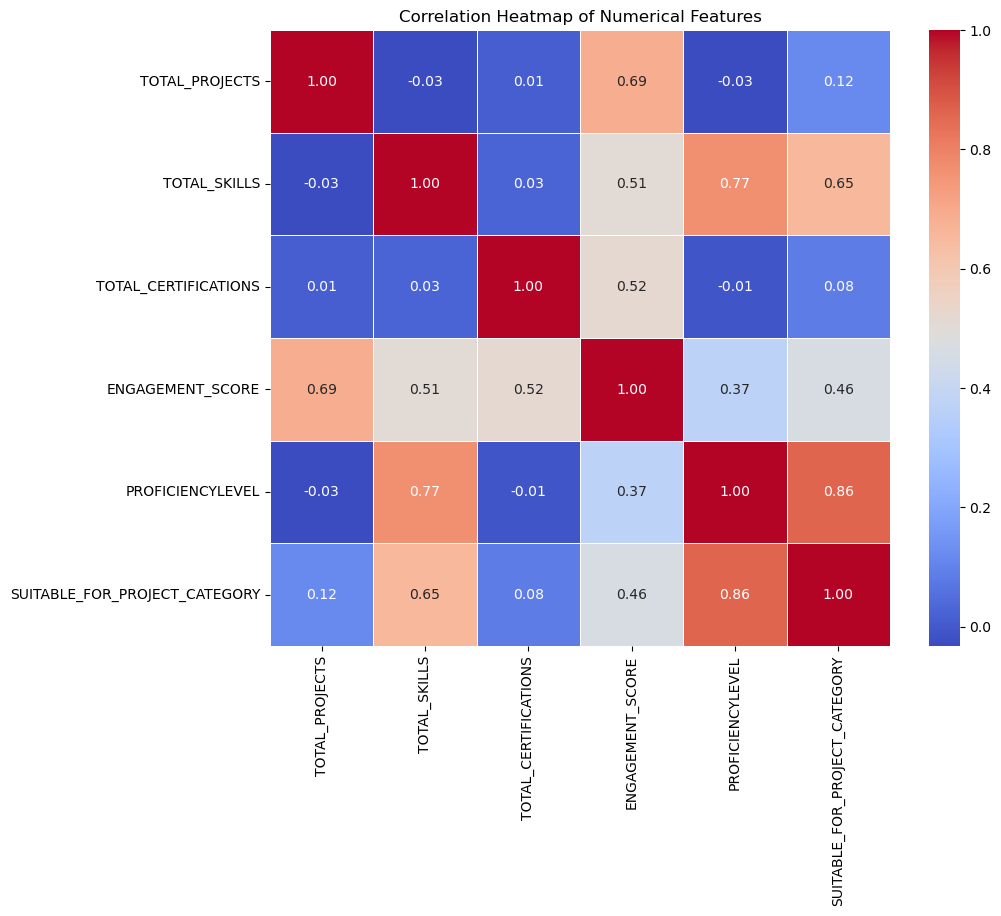

In [21]:
correlation_matrix = combined_data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [39]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Assuming 'SKILLNAME' and 'PROFICIENCYLEVEL' are the categorical variables
categorical_features = ['SKILLNAME', 'PROFICIENCYLEVEL','ROLE','DESIGNATION']

# Encode categorical variables
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    combined_data[feature] = label_encoders[feature].fit_transform(combined_data[feature])

# Selecting relevant features and target
X_chi2 = combined_data[categorical_features]
y_chi2 = combined_data['SUITABLE_FOR_PROJECT_CATEGORY']

# Compute chi-square statistics and p-values
chi2_scores, p_values = chi2(X_chi2, y_chi2)

# Print chi-square scores and p-values for each feature
for i, feature in enumerate(categorical_features):
    print(f"Chi-square score for {feature}: {chi2_scores[i]}, p-value: {p_values[i]}")


Chi-square score for SKILLNAME: 8767.767673825092, p-value: 0.0
Chi-square score for PROFICIENCYLEVEL: 816.0514073863092, p-value: 1.7467837548184253e-179
Chi-square score for ROLE: 0.5323879982627224, p-value: 0.46560462214578646
Chi-square score for DESIGNATION: 4.4903617859551, p-value: 0.034086463267198795


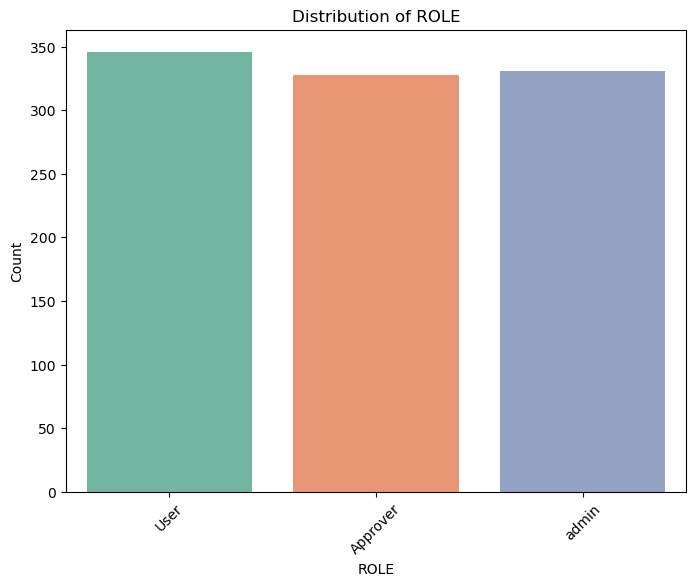

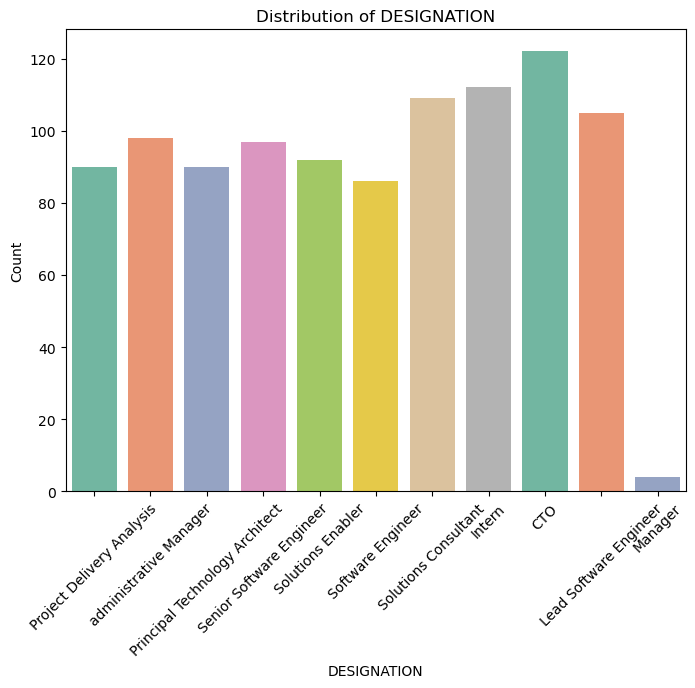

In [22]:
# Visualize distributions of categorical features
categorical_cols = ['ROLE','DESIGNATION']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=combined_data, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


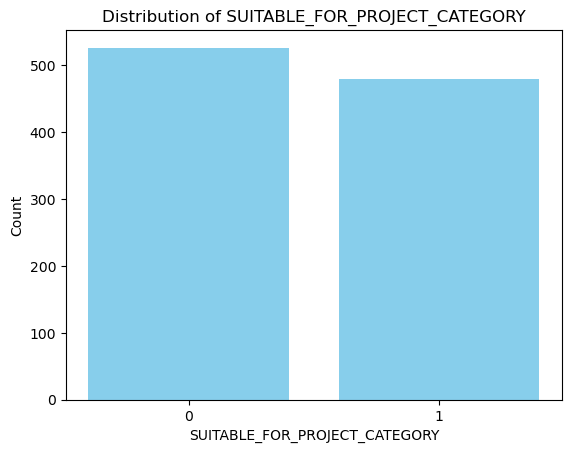

In [27]:
import matplotlib.pyplot as plt
category_counts = combined_data['SUITABLE_FOR_PROJECT_CATEGORY'].value_counts()
plt.bar([0, 1], category_counts, color='skyblue')
plt.xlabel('SUITABLE_FOR_PROJECT_CATEGORY')
plt.ylabel('Count')
plt.title('Distribution of SUITABLE_FOR_PROJECT_CATEGORY')
plt.xticks([0, 1])
plt.show()


In [30]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define categorical and numeric features
categorical_features = ['SKILLNAME']
numeric_features = ['PROFICIENCYLEVEL', 'ENGAGEMENT_SCORE']

# Define transformations for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
# Define the features for training
X = combined_data[['SKILLNAME', 'PROFICIENCYLEVEL', 'TOTAL_PROJECTS', 'TOTAL_SKILLS', 'TOTAL_CERTIFICATIONS', 'ENGAGEMENT_SCORE']]

# Define the target variable
y = combined_data['SUITABLE_FOR_PROJECT_CATEGORY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resample the training data
oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate the logistic regression model
y_pred = classifier.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision and recall for each class
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)

average_precision = precision_score(y_test, y_pred, average='macro')
average_recall = recall_score(y_test, y_pred, average='macro')

print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Accuracy: {accuracy}")


Average Precision: 0.9695134061569017
Average Recall: 0.9707287933094384
Accuracy: 0.9701492537313433


In [36]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
def calculate_engagement_score(total_projects, total_skills, total_certifications):
    return (total_projects * 0.3) + (total_skills * 0.3) + (total_certifications * 0.2)

def get_user_input():
    skill_name = input("Enter the skill name: ")
    proficiency_level = float(input("Enter the proficiency level (1 to 10): "))
    total_projects = int(input("Enter total projects completed: "))
    total_skills = int(input("Enter total skills: "))
    total_certifications = int(input("Enter total certifications: "))
    
    # Calculate engagement score
    engagement_score = calculate_engagement_score(total_projects, total_skills, total_certifications)
    
    # Scale features using MinMaxScaler
    scaler = MinMaxScaler()
    features = scaler.fit_transform([[total_projects, total_skills, total_certifications]])[0]
    
    # Create DataFrame with scaled features and engagement score
    df = pd.DataFrame([[skill_name, proficiency_level/10, features[0], features[1], features[2], engagement_score]], 
                      columns=['SKILLNAME', 'PROFICIENCYLEVEL', 'TOTAL_PROJECTS', 'TOTAL_SKILLS', 'TOTAL_CERTIFICATIONS', 'ENGAGEMENT_SCORE'])
    
    return df

def predict_suitability(user_input):
    prediction = classifier.predict(user_input)
    if prediction[0] == 1:
        print("The user is suitable for the project.")
    else :
        print("The user is not suitable for the project.")

user_input = get_user_input()

predict_suitability(user_input)



Enter the skill name: jv
Enter the proficiency level (1 to 10): 7
Enter total projects completed: 4
Enter total skills: 3
Enter total certifications: 4
The user is suitable for the project.
